In [29]:
%matplotlib inline

In [30]:
import numpy as np

from msslib.utils import *
import matplotlib.pyplot as plt
import matplotlib as mpl

import functools as f

from sklearn import metrics

In [72]:
def normalise_confusion_matrix(cm: np.ndarray):
    return cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(plt, score):
    c_m = normalise_confusion_matrix(score['c_matrix'])
    plt.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)

In [32]:
test_results = []

In [52]:
test_runs = ["F"]#,"C"]#,"B","C","D","E"]#,"F"]
results_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/15blocks/LDA_Grid_CRF/"
label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/labels/"


In [53]:

for letter in test_runs:
    results_paths = listpaths(os.path.join(results_dir, letter))
    label_paths = [format_path(label_dir, 'png', only_basename(p)) for p in results_paths]

    load_results = map(lambda x: np.load(x).flatten(), results_paths)
    results = f.reduce(lambda x,y: np.append(y, x), load_results)

    load_labels = map(lambda x: misc.imread(x).flatten(), label_paths)
    labels = f.reduce(lambda x,y: np.append(y, x), load_labels)

    p,r,fs,_ = metrics.precision_recall_fscore_support(labels, results, average='weighted')
    print(fs, "---", p, r)
    c_m = metrics.confusion_matrix(labels, results)

    test_results.append(
        {'label': letter, 
         'precision': p,
         'recall': r,
         'fscore': fs,
         'c_matrix': c_m
        })

np.save(os.path.join(results_dir, "results.npy"), np.asarray(test_results))

0.87148361332 --- 0.887677049908 0.858295263533


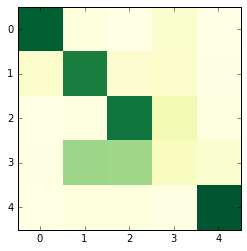

In [73]:
plot_confusion_matrix(plt, test_results[3])

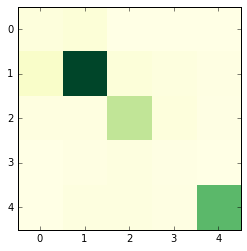

In [67]:
plt.imshow(test_results[5]['c_matrix'], interpolation='nearest', cmap=plt.cm.YlGn)

In [112]:
LDA_grid = np.load("/home/finlay/HMT/data/VenetusA/1200Hx900W/15blocks/LDA_Grid_CRF/results.npy")
from msslib.data import *

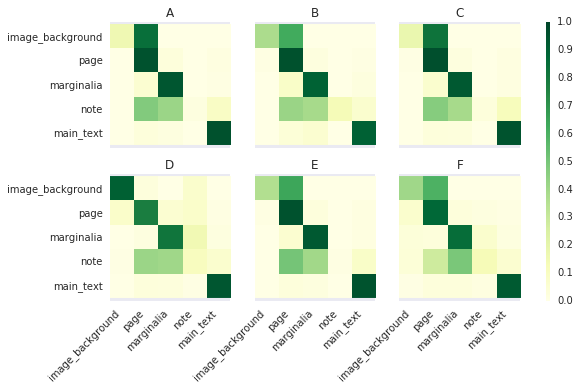

In [113]:
fig, axes = plt.subplots(2, 3, figsize=(9.2,5),sharex='col', sharey='row')

tick_marks = np.arange(len(mss_labels))
axes[0][0].set_yticklabels(['']+mss_labels)
axes[1][0].set_yticklabels(['']+mss_labels)
axes[1][0].set_xticklabels(['']+mss_labels,ha='right', rotation=45)
axes[1][1].set_xticklabels(['']+mss_labels,ha='right', rotation=45)
axes[1][2].set_xticklabels(['']+mss_labels,ha='right', rotation=45)

for a, s in zip(axes.flat, LDA_grid):
    a.set_title(s['label'][0])
    a.grid(False)
    c_m = normalise_confusion_matrix(s['c_matrix'])
    im = a.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)
    
cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat], aspect=70)
plt.colorbar(im, cax=cax, **kw)

plt.savefig('/home/finlay/for_report/confusion.pdf', bbox_inches='tight', pad_inches=0.1,)

In [83]:
collected_results = f.reduce(lambda x, y: y + x, map(lambda x: x['c_matrix'], LDA_grid))

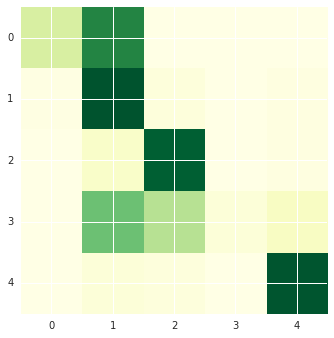

In [114]:
plot_confusion_matrix(plt, {'c_matrix':collected_results})

In [92]:
collected_results = f.reduce(lambda x, y: y + x, map(lambda x: x[''], LDA_grid))

In [119]:
np.set_printoptions(precision=2)
print(np.mean([x['fscore'] for x in LDA_grid]))

0.886821584725
